Dataset - https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?select=report_2018-2019.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('report_2018-2019.csv')

In [3]:
df.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [4]:
len(df['Country or region'].unique())

160

In [5]:
df.isna().sum()

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# EDA

In [6]:
df = df.drop(columns=['Overall rank', 'Year'])

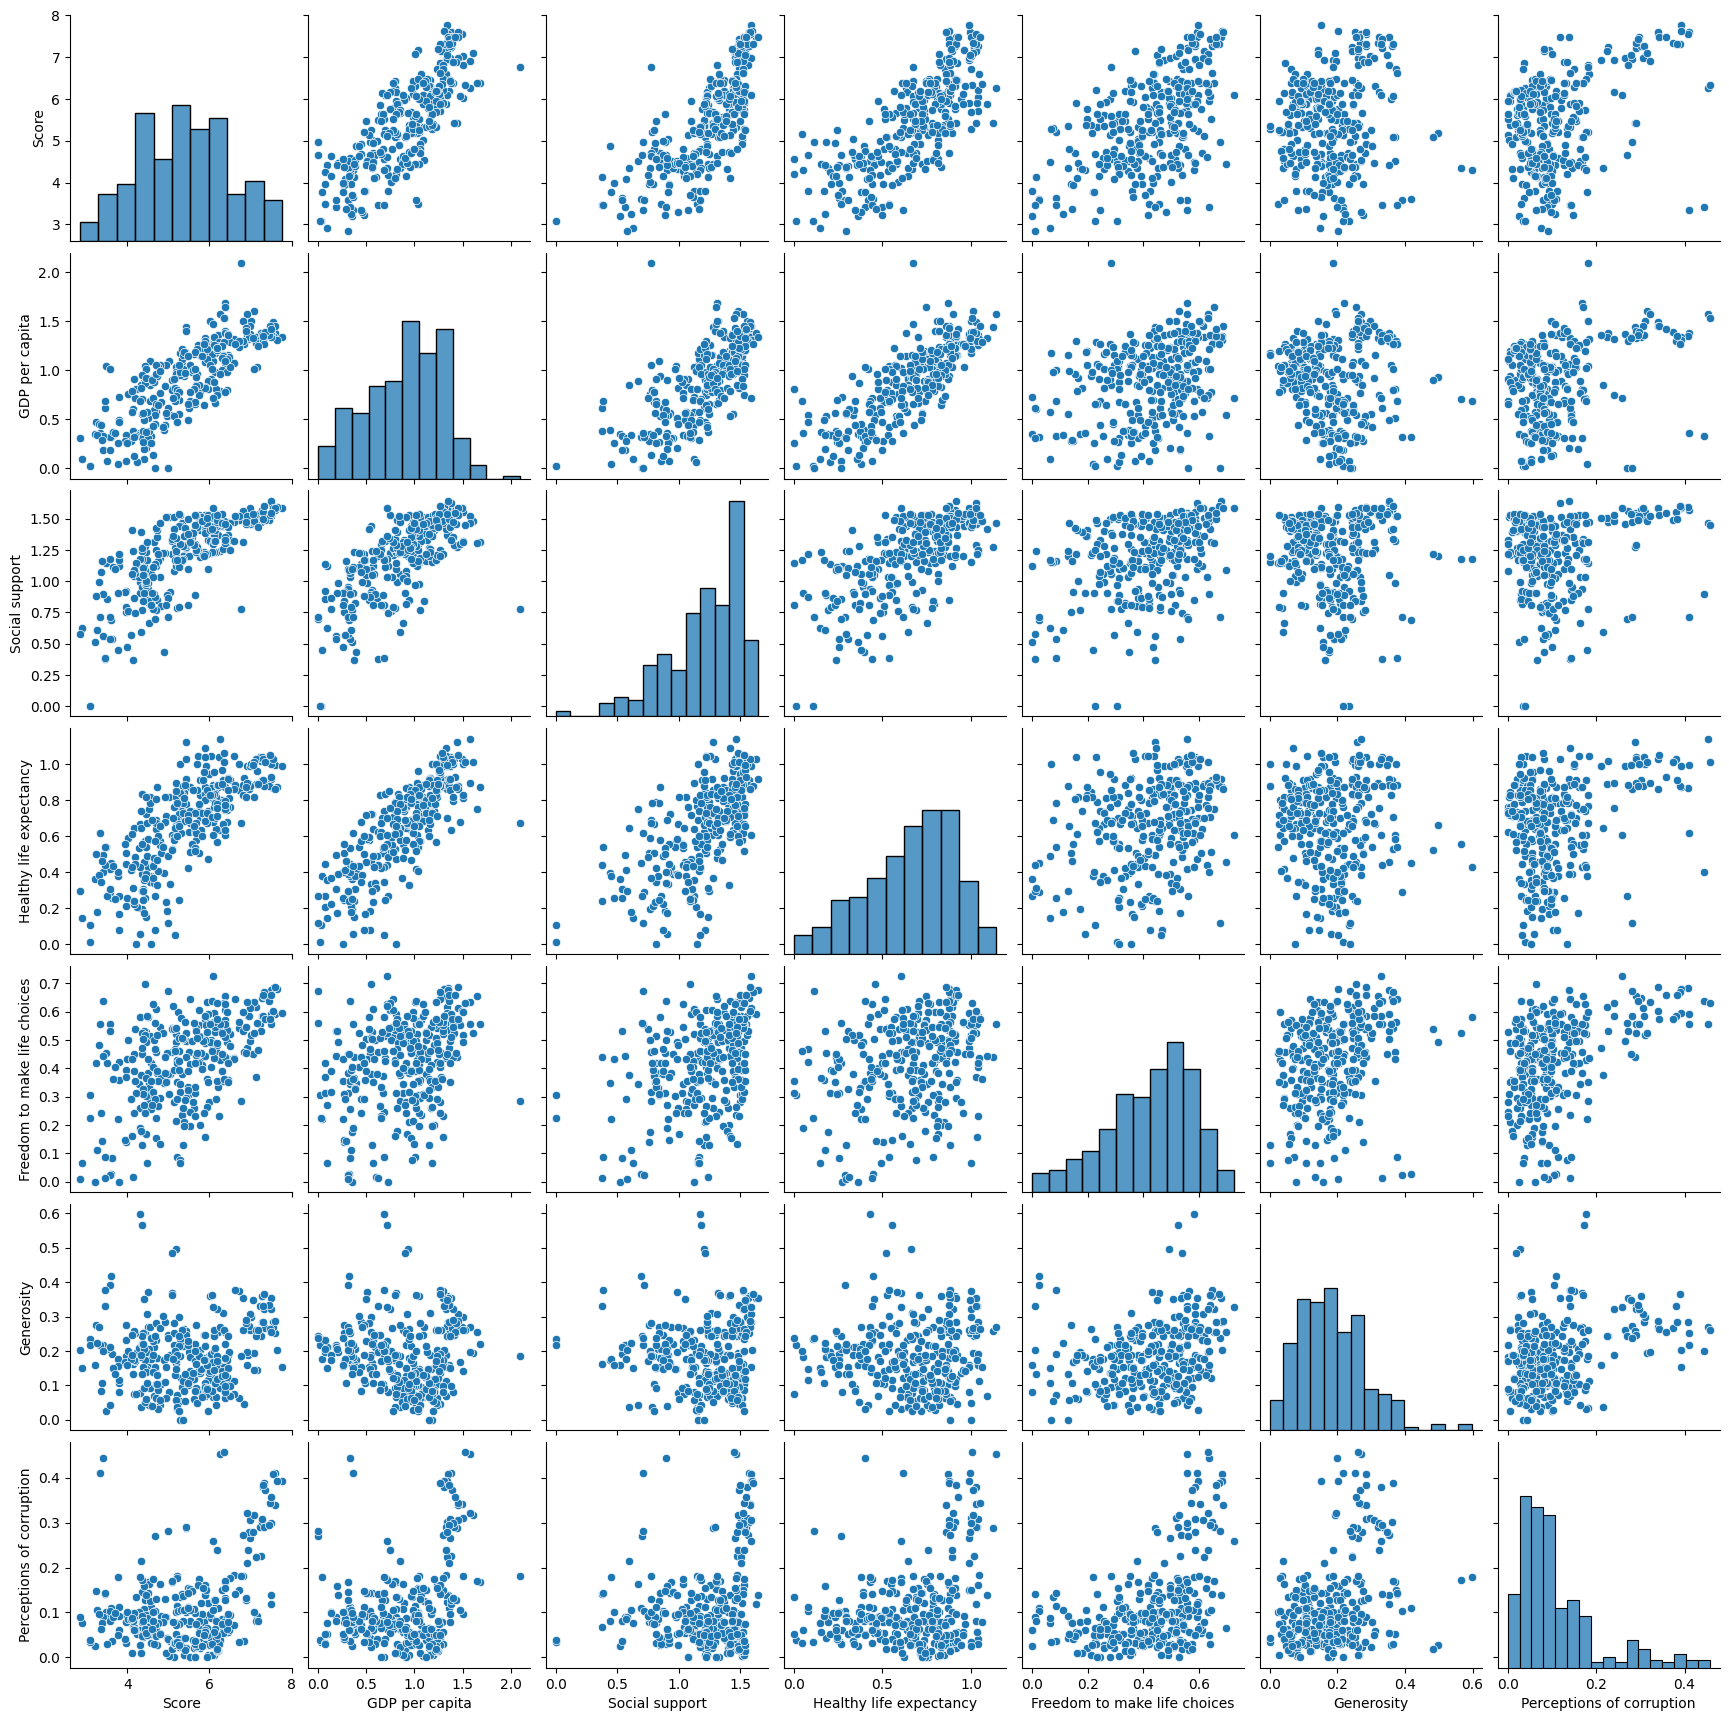

In [7]:
sns.pairplot(df)

In [8]:
df['Score'].describe()

count    312.000000
mean       5.391506
std        1.114631
min        2.853000
25%        4.514250
50%        5.379500
75%        6.176000
max        7.769000
Name: Score, dtype: float64

<AxesSubplot: xlabel='Country or region'>

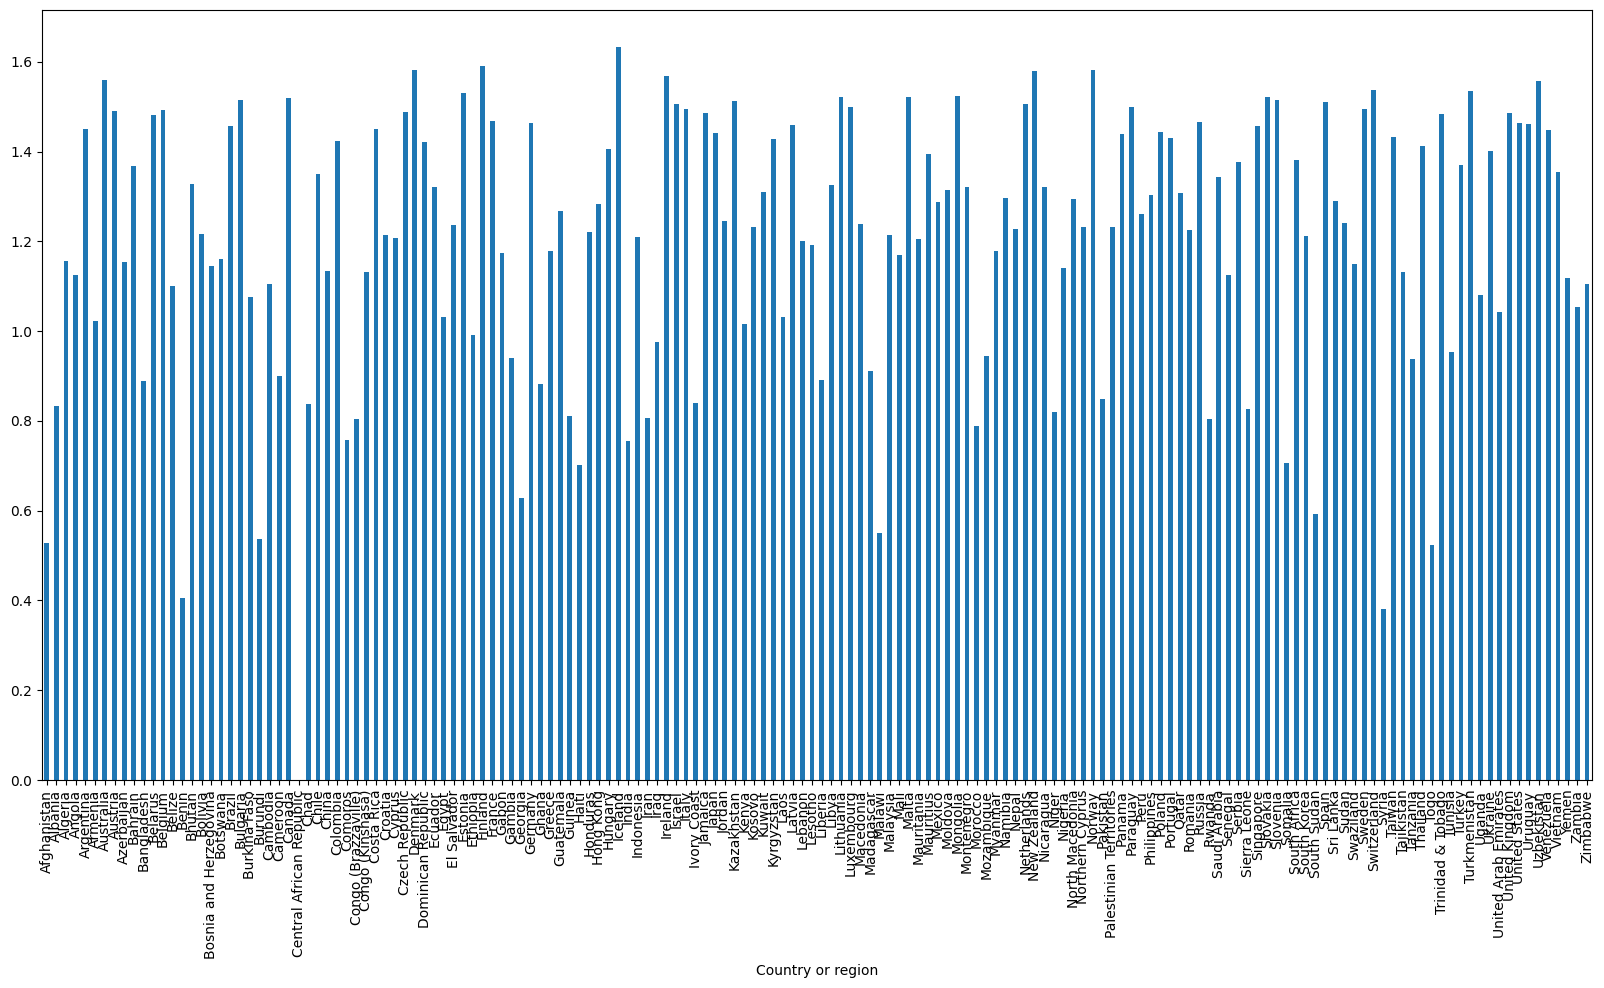

In [9]:
df.groupby('Country or region')['Social support'].mean().plot(kind='bar', figsize=(20, 10))

# Prepare data

In [10]:
X, y = df.drop(columns=['Country or region', 'Score']), df['Score']

In [11]:
X.shape, y.shape

((312, 6), (312,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, y_train.shape

((249, 6), (249,))

Scale data

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train linear model

In [16]:
linear_model = LinearRegression() # Ridge - l2 -  Lasso - l1

In [17]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
X.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [19]:
linear_model.coef_

array([0.39229392, 0.31822878, 0.24409795, 0.24842834, 0.06199475,
       0.03241956])

# Predict and compute linear metrics

In [20]:
y_pred = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)

In [21]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred)

train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
test_mape = mean_absolute_percentage_error(y_test, y_pred)


In [22]:
print(f'Train MSE: {train_mse} Test MSE: {test_mse}')
print(f'Train R2: {train_r2} Test R2: {test_r2}')
print(f'Train MAPE: {train_mape} Test MAPE: {test_mape}')

Train MSE: 0.26802294777244756 Test MSE: 0.2786724791975483
Train R2: 0.7911074985396445 Test R2: 0.7371366383685722
Train MAPE: 0.08247821163380756 Test MAPE: 0.08233069245627944


# Train Decision tree

In [23]:
tree_model = DecisionTreeRegressor()

In [24]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
X.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [26]:
tree_model.feature_importances_

array([0.21372581, 0.58395326, 0.07000603, 0.08508337, 0.03402642,
       0.01320512])

In [27]:
tree_model.get_n_leaves()

246

In [28]:
tree_model.get_depth()

15

In [29]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Predict and compute tree metrics

In [30]:
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [31]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred)

train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
test_mape = mean_absolute_percentage_error(y_test, y_pred)


In [32]:
print(f'Train MSE: {train_mse} Test MSE: {test_mse}')
print(f'Train R2: {train_r2} Test R2: {test_r2}')
print(f'Train MAPE: {train_mape} Test MAPE: {test_mape}')

Train MSE: 0.0 Test MSE: 0.3589143174603175
Train R2: 1.0 Test R2: 0.6614469276013872
Train MAPE: 0.0 Test MAPE: 0.09001539658479885


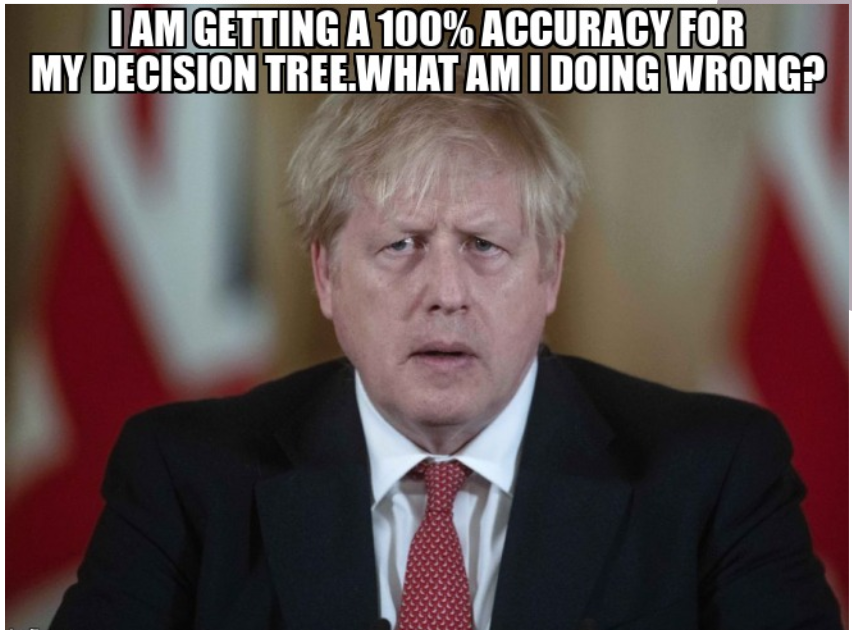

# Train Decision tree without overfitting

Проблема в параметрах max_depth=None и max_leaf_nodes=None - на практике по бустингам посмотрим, что такое перебор гиперпараметров

In [33]:
tree_model = DecisionTreeRegressor(max_depth=3)

In [34]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [35]:
X.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [36]:
tree_model.feature_importances_

array([0.23428829, 0.67581203, 0.041032  , 0.04886768, 0.        ,
       0.        ])

In [37]:
tree_model.get_n_leaves()

8

In [38]:
tree_model.get_depth()

3

In [39]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Predict and compute tree metrics

In [40]:
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [41]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred)

train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
test_mape = mean_absolute_percentage_error(y_test, y_pred)


In [42]:
print(f'Train MSE: {train_mse} Test MSE: {test_mse}')
print(f'Train R2: {train_r2} Test R2: {test_r2}')
print(f'Train MAPE: {train_mape} Test MAPE: {test_mape}')

Train MSE: 0.26262606835286945 Test MSE: 0.3021302381353477
Train R2: 0.7953137340556896 Test R2: 0.7150096404372177
Train MAPE: 0.08226284479090401 Test MAPE: 0.08418830283406012
